You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)



Confusion Matrix:
[[81 18]
 [19 36]]


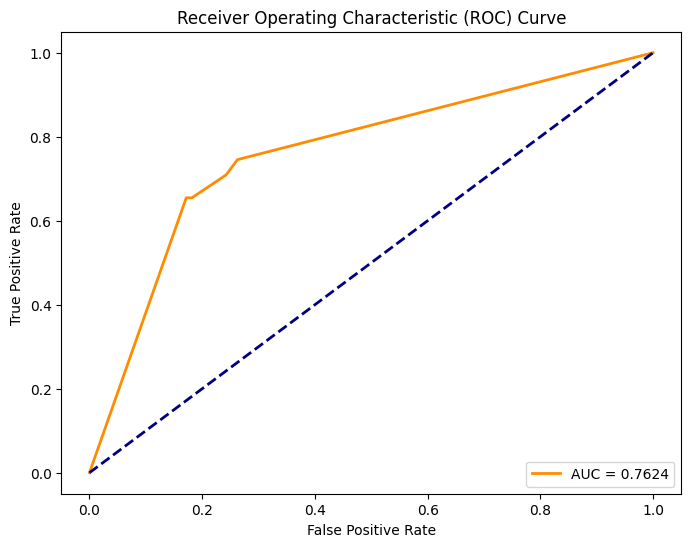

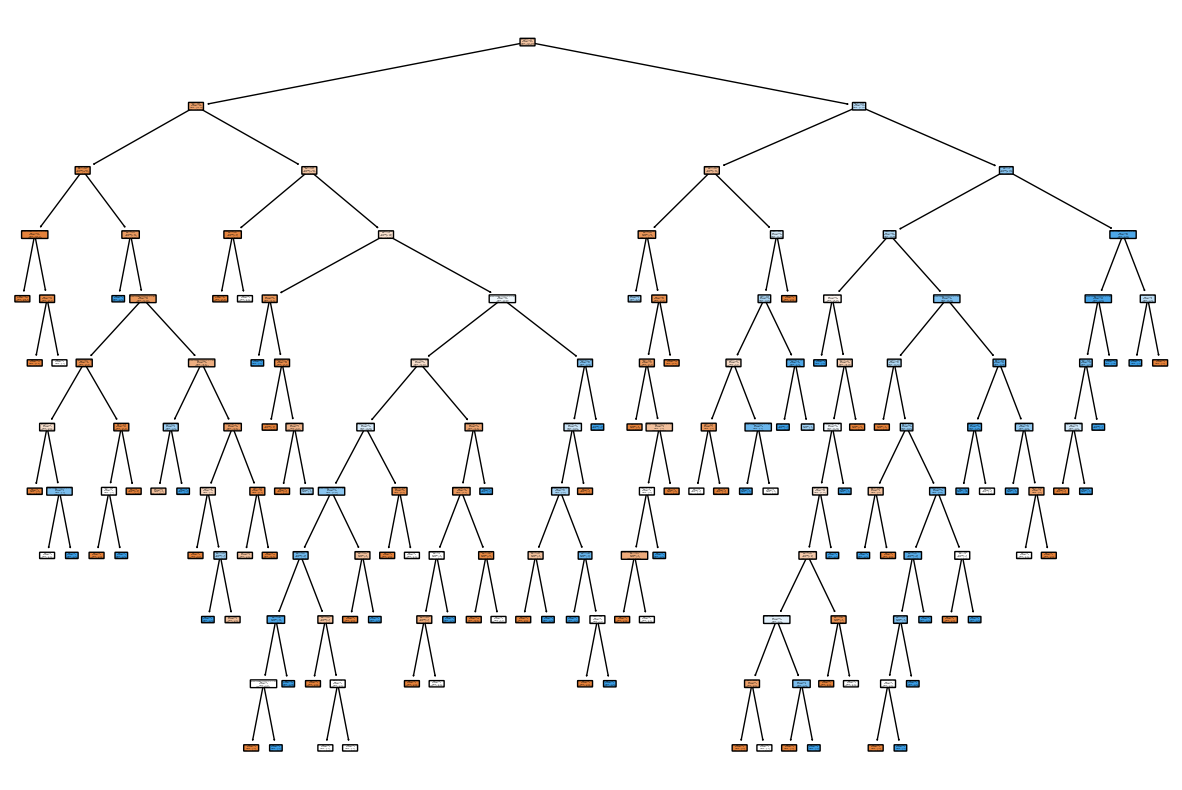

Best Parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy on Test Set: 0.7597402597402597
Precision on Test Set: 0.6666666666666666
Recall on Test Set: 0.6545454545454545
F1 Score on Test Set: 0.6605504587155963


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the diabetes dataset from the CSV file
file_path = "diabetes.csv"  # Update with the actual file path
diabetes_df = pd.read_csv(file_path)

# Assuming that the target variable is named 'Outcome'
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.show()

# Print results
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("Precision on Test Set:", precision)
print("Recall on Test Set:", recall)
print("F1 Score on Test Set:", f1)


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset from the CSV file
file_path = "diabetes.csv"  # Update with the actual file path
diabetes_df = pd.read_csv(file_path)

# Assuming that the target variable is named 'target'
sns.pairplot(diabetes_df, hue='Outcome')
plt.show()

In [ ]:
# Print the number of missing values for each column
missing_values = diabetes_df.isnull().sum()
print("Number of Missing Values for Each Column:")
print(missing_values)


Number of Missing Values for Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


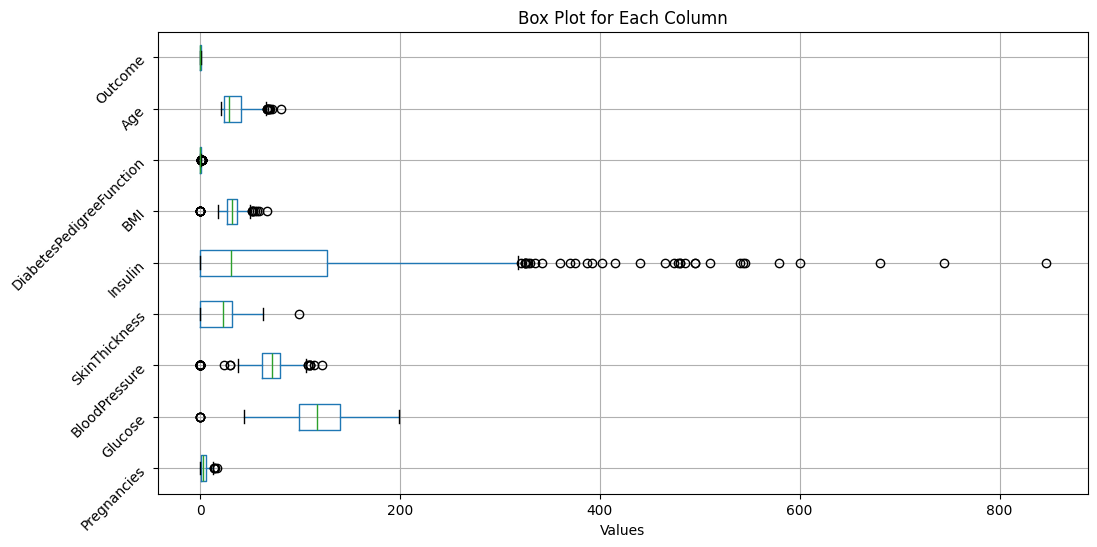

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'diabetes_df' is your DataFrame
# Replace 'path/to/diabetes.csv' with the actual file path if needed
file_path = "diabetes.csv"
diabetes_df = pd.read_csv(file_path)

# Plot box plots for each column
plt.figure(figsize=(12, 6))
diabetes_df.boxplot(rot=45, vert=False)
plt.title('Box Plot for Each Column')
plt.xlabel('Values')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'diabetes_df' is your DataFrame
# Replace 'path/to/diabetes.csv' with the actual file path if needed
file_path = "diabetes.csv"
diabetes_df = pd.read_csv(file_path)

# Calculate the average of 'Insulin' excluding values greater than 550
average_insulin = diabetes_df.loc[diabetes_df['Insulin'] <= 550, 'Insulin'].mean()

# Replace values greater than 550 with the calculated average
diabetes_df.loc[diabetes_df['Insulin'] > 550, 'Insulin'] = average_insulin

# Verify the changes
print(diabetes_df['Insulin'])


0        0.0
1        0.0
2        0.0
3       94.0
4      168.0
       ...  
763    180.0
764      0.0
765    112.0
766      0.0
767      0.0
Name: Insulin, Length: 768, dtype: float64


C:\Users\jaide\AppData\Local\Temp\ipykernel_22488\883486839.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '75.80209698558322' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_df.loc[diabetes_df['Insulin'] > 550, 'Insulin'] = average_insulin
